# Fighting COVID-19: Learning from South Korea

**Table of Contents**<a id='toc0_'></a>    
- 1. [Introduction          ](#toc1_)    
- 2. [ Notebook Preparation          ](#toc2_)    
- 3. [Picture of COVID-19 Patient        ](#toc3_)    
  - 3.1. [Data Preparation and Cleaning          ](#toc3_1_)    
    - 3.1.1. [Summary on Patient Information Quality          ](#toc3_1_1_)    
  - 3.2. [Patient Description          ](#toc3_2_)    
    - 3.2.1. [Summary on Patient Description      ](#toc3_2_1_)    
  - 3.3. [Patient Outcomes      ](#toc3_3_)    
    - 3.3.1. [Summary on Patient Outcomes      ](#toc3_3_1_)    
  - 3.4. [Application to Lithuania      ](#toc3_4_)    
- 4. [COVID-19 Spread Cases       ](#toc4_)    
  - 4.1. [Data Preparation and Cleaning     ](#toc4_1_)    
    - 4.1.1. [Summary on Infection Case Data Quality     ](#toc4_1_1_)    
  - 4.2. [ Infection Cases in South Korea    ](#toc4_2_)    
  - 4.3. [Insights for Outbreak Prevention    ](#toc4_3_)    
- 5. [Pandemic Evolution and Government Reaction         ](#toc5_)    
  - 5.1. [Data Preparation and Cleaning          ](#toc5_1_)    
    - 5.1.1. [Summary on Timeseries and Government Policy Data Quality   ](#toc5_1_1_)    
  - 5.2. [Half a Year of COVID-19 in South Korea   ](#toc5_2_)    
  - 5.3. [ Insights for Pandemic Management  ](#toc5_3_)    
- 6. [Recommendations  ](#toc6_)    
- 7. [Suggestions for Improvement  ](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Note that the links in the above table of contents do not work on GitHub or Google Colab. In Google Colab, please use its embedded table of contents.

## 1. <a id='toc1_'></a>Introduction           [&#8593;](#toc0_)

The **aim** of this work is to analyze the COVID-19 data from South Korea and prepare recommendations for fighting the next wave of the pandemic in Lithuania.

The work **objectives** are as follows:
* Provide the picture of a COVID-19 patient;
* Get insights on COVID-19 infection cases;
* Describe the spread of COVID-19 and government reaction to it.

**Resources** from South Korea available for analysis:
1. Data of COVID-19 infection cases 
2. Epidemiological data of COVID-19 patients (from 2020-01-20 to 2020-06-30)
3. Time series data of COVID-19 status 
    * in terms of diagnostic tests (from 2020-01-20 to 2020-06-30)
    * in terms of the age (from 2020-03-02 to 2020-06-30)
    * in terms of gender (from 2020-03-02 to 2020-06-30)
    * in terms of the province (from 2020-01-20 to 2020-06-30)
4. Additional data:
    * location and statistical data of the regions
    * data of the weather in the regions (from 2016-01-01 to 2020-06-29)
    * trend data of the keywords searched in NAVER which is one of the largest portals in South Korea (from 2016-01-01 to 2020-06-29)
    * data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub) (from 2020-01-01 to 2020-05-31)
    * data of the government policy for COVID-19 (as of 2020-06-30)

However, in this work only a part of the available resources is used.    

## 2. <a id='toc2_'></a> Notebook Preparation           [&#8593;](#toc0_)

Import libraries for data analysis and visualization. Set parameters for display.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import plotly.express as px
from covid_analysis_helpers import custom_plots, custom_maps, data_loader
from IPython.display import Image

static = True # if plotly output needs to be static
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (8, 5),
}
sns.set_theme(
    context="notebook", style="whitegrid", rc=custom_params
)
px.defaults.template = "seaborn"
pd.set_option("display.precision", 2)

%matplotlib inline

Download the dataset from [Kaggle](https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset) if it is not already in the `data` folder. For the method provided below to work, [Kaggle API](https://github.com/Kaggle/kaggle-api) needs to be configured on the system:

In [2]:
dataset_csv = "./data/PatientInfo.csv"

if not os.path.exists(dataset_csv):
    !kaggle datasets download --unzip kimjihoo/coronavirusdataset -p data
else:
    print("Data already downloaded")

Data already downloaded


## 3. <a id='toc3_'></a>Picture of COVID-19 Patient         [&#8593;](#toc0_)

In this section, epidemiological COVID-19 information will be analyzed to provide the picture of the statistical COVID-19 patient in South Korea.

### 3.1. <a id='toc3_1_'></a>Data Preparation and Cleaning           [&#8593;](#toc0_)

Load epidemiological data into `patient_info` dataframe. If possible, introduce appropriate data types and create necessary additional columns.

In [3]:
patient_info = data_loader.load_patient_info("./data/PatientInfo.csv")
print("\nPreview of the dataframe:")
patient_info.head()


./data/PatientInfo.csv successfully loaded into dataframe.
Column 'age_category' created. Defines young (0-29), middle (30-59), and old (60+).
Column 'symptom_to_confirmed' created. Defines number of days from symptom onset to confirmation.


Column 'confirmed_to_released' created. Defines number of days from confirmation to release.
Column 'confirmed_to_deceased' created. Defines number of days from confirmation to decease.
Dataframe index set to 'patient_id'.

Data types of each column:
sex                            category
age                            category
country                          object
province                         object
city                             object
infection_case                   object
infected_by                      object
contact_number                  float32
symptom_onset_date       datetime64[ns]
confirmed_date           datetime64[ns]
released_date            datetime64[ns]
deceased_date            datetime64[ns]
state                          category
age_category                   category
symptom_to_confirmed            float32
confirmed_to_released           float32
confirmed_to_deceased           float32
dtype: object

Preview of the dataframe:


,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_category,symptom_to_confirmed,confirmed_to_released,confirmed_to_deceased
patient_id,,,,,,,,,,,,,,,,,
1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released,middle,1.0,13.0,NaN
1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaT,2020-01-30,2020-03-02,NaT,released,middle,NaN,32.0,NaN
1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17.0,NaT,2020-01-30,2020-02-19,NaT,released,middle,NaN,20.0,NaN
1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released,young,4.0,16.0,NaN
1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2.0,NaT,2020-01-31,2020-02-24,NaT,released,young,NaN,24.0,NaN


Check if there is any duplicated patient IDs:

In [4]:
patient_info.loc[patient_info.index.duplicated(False)]


,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_category,symptom_to_confirmed,confirmed_to_released,confirmed_to_deceased
patient_id,,,,,,,,,,,,,,,,,
1200012238,female,20s,Korea,Daegu,Icheon-dong,overseas inflow,NaN,NaN,NaT,2020-06-17,NaT,NaT,isolated,young,NaN,NaN,NaN
1200012238,female,20s,Korea,Daegu,Nam-gu,overseas inflow,NaN,NaN,NaT,2020-06-17,NaT,NaT,isolated,young,NaN,NaN,NaN


Icheon-dong	is not a valid city within Daegu province, so the last duplicated row is kept.


In [5]:
patient_info = patient_info[~patient_info.index.duplicated(keep="last")]


Number of unique Covid-19 diagnoses:

In [6]:
patient_info.index.nunique()


5164

Data availability within each column varies. However, country, province and state are available for all patients. 

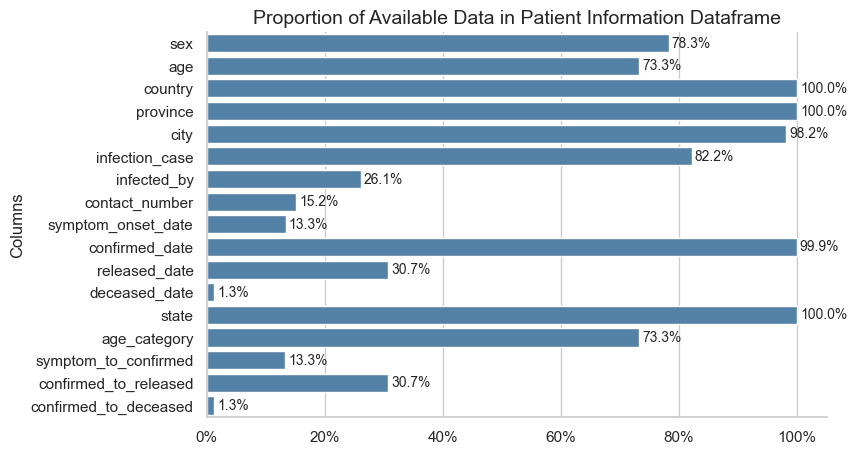

In [7]:
custom_plots.plot_available_data(
    patient_info,
    title="Proportion of Available Data in Patient Information Dataframe",
)
plt.show()


Missing information on infection case can be filled in with "etc":

In [8]:
patient_info["infection_case"] = patient_info["infection_case"].fillna(
    value="etc"
)


There are several patients without COVID-19 confirmation date. They might be interrelated as the IDs follow one another and patients reside in the same city.

In [9]:
patient_info.loc[patient_info["confirmed_date"].isnull()]


,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,age_category,symptom_to_confirmed,confirmed_to_released,confirmed_to_deceased
patient_id,,,,,,,,,,,,,,,,,
6011000051,female,40s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaT,NaT,NaT,NaT,released,middle,NaN,NaN,NaN
6011000052,female,0s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,NaT,NaT,NaT,NaT,released,young,NaN,NaN,NaN
6011000053,female,10s,Korea,Gyeongsangbuk-do,Andong-si,etc,NaN,NaN,2020-04-15,NaT,NaT,NaT,released,young,NaN,NaN,NaN


Data on patients demographics are missing mostly in entries from Incheon metropolitan city, Seoul special city, and Gyeonggi and Jeju provinces. In terms of patient state, most data on demographics are missing for isolated patients.

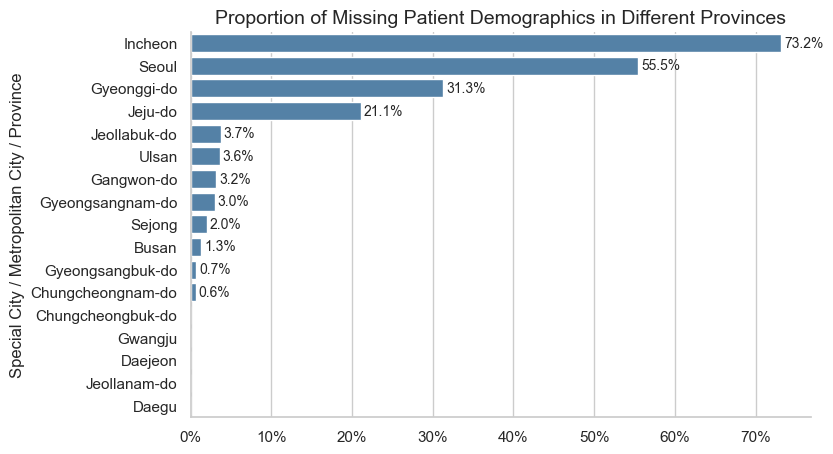

In [10]:
missing_demographics_province = (
    patient_info.groupby("province")[["sex", "age"]].apply(
        lambda x: x.isna().any(axis=1).sum()
    )
    / patient_info["province"].value_counts()
)
fig = custom_plots.barplot_counts(
    sr=missing_demographics_province,
    percentage=True,
    ylabel="Special City / Metropolitan City / Province",
    title="Proportion of Missing Patient Demographics in Different Provinces",
)
plt.show()


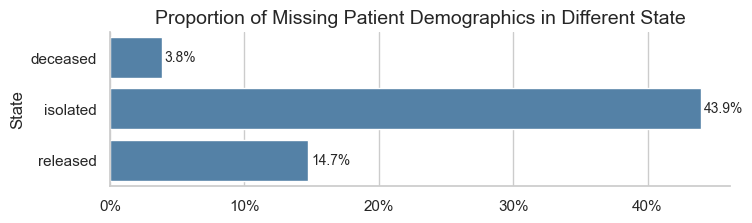

In [11]:
missing_demographics_state = (
    patient_info.groupby("state")[["sex", "age"]].apply(
        lambda x: x.isna().any(axis=1).sum()
    )
    / patient_info["state"].value_counts()
)
fig = custom_plots.barplot_counts(
    sr=missing_demographics_state,
    percentage=True,
    ylabel="State",
    title="Proportion of Missing Patient Demographics in Different State",
)
fig.set_figheight(2)
plt.show()


#### 3.1.1. <a id='toc3_1_1_'></a>Summary on Patient Information Quality           [&#8593;](#toc0_)

The epidemiological dataset of COVID-19 patients contains 5164 unique entries. Country, province, and state information are available for all patients. Only 3 patients have missing confirmation date. Unavailability of data in other columns is reasonable and possible, so no entries are removed except for the duplicate. It can be seen that unavailability of demographic information varies in different provinces and is prevalent for isolated patients.

### 3.2. <a id='toc3_2_'></a>Patient Description           [&#8593;](#toc0_)

The following patient description is based only on available data. There is no reason to assume that some age categories, males or females provide less information. Therefore, missing values are ignored, i.e., 100% corresponds only to available values. Up to the end of June, 2020 more females were confirmed as COVID-19 patients in South Korea. The biggest proportion of patients were in their 20s. A lot smaller amount of patients were children or older than 70.

Possible reasons for a higher COVID-19 confirmation among females:
* occupation increasing the risk of exposure, e.g., nursing or caregiving,
* testing bias towards older people, of whom a higher proportion is female,
* tendency to seek healthcare more frequently than males.

Possible reasons for a higher COVID-19 confirmation among working-age population:
* being socially active,
* occupation requiring contact with others, e.g., hospitality or customer service,
* testing strategy involving contact tracing measures.

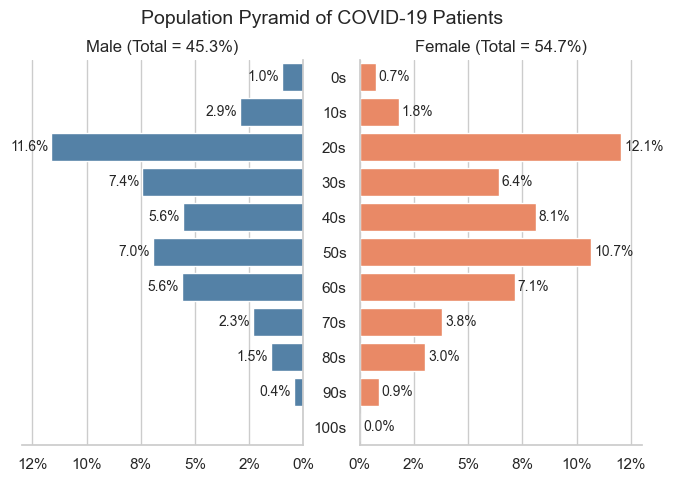

In [12]:
number_by_age_sex = (
    patient_info.groupby(["age", "sex"])
    .size()
    .reset_index()
    .pivot(columns="sex", index="age", values=0)
)
custom_plots.population_pyramid(
    df=number_by_age_sex,
    columns=["male", "female"],
    x_max=13,
    title="Population Pyramid of COVID-19 Patients",
)
plt.show()


Unidentified source of infection and contact with patient accounted for the third of COVID-19 confirmations each. Also, many patients got COVID-19 while traveling. Other cases, which added to COVID-19 spread were workplaces, churches, clubs, sport facilities, hospitals, care and nursing centers.

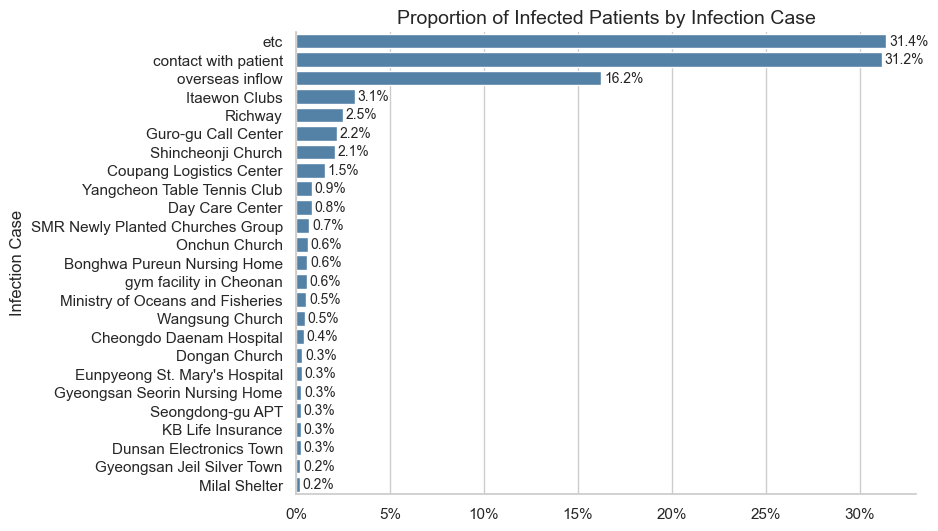

In [13]:
fig = custom_plots.barplot_counts(
    sr=patient_info["infection_case"].value_counts(normalize=True),
    min_value=0.2 / 100,
    percentage=True,
    ylabel="Infection Case",
    title="Proportion of Infected Patients by Infection Case",
)
fig.set_figheight(6)
plt.show()


Some patients were identified as possible infectors of multiple patients. Of those, who were confirmed as infectors of at least 10 patients, most were females and from Gyeonggi province. It is possible that this province carried out a more robust COVID-19 infection tracking.

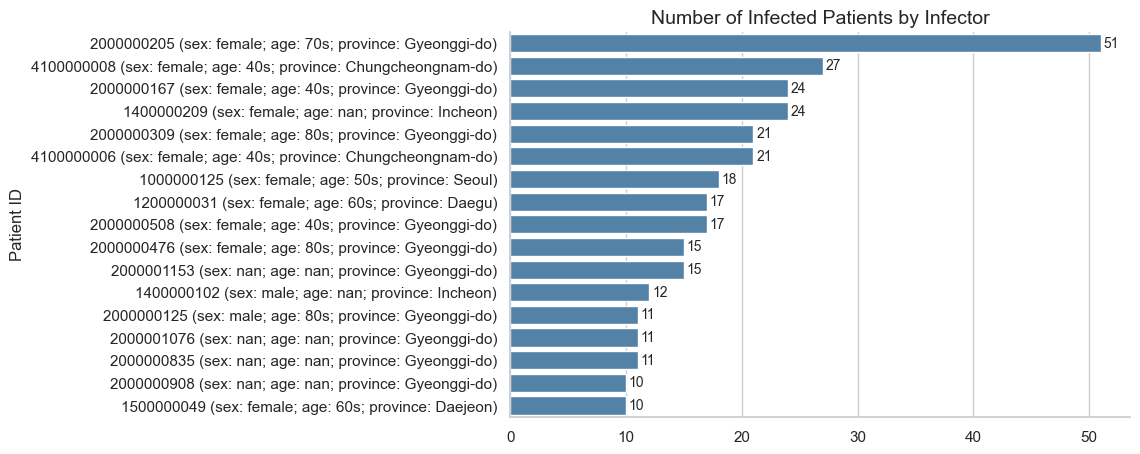

In [14]:
infector_counts = patient_info["infected_by"].value_counts()
ytick_info = infector_counts[infector_counts >= 10].index.to_frame(
    name="id_string"
)
ytick_info["info_string"] = patient_info.loc[ytick_info.index].apply(
    lambda x: " (sex: "
    + str(x.sex)
    + "; age: "
    + str(x.age)
    + "; province: "
    + x.province
    + ")",
    axis=1,
)
ytick_info["info_string"] = ytick_info["id_string"] + ytick_info["info_string"]

fig = custom_plots.barplot_counts(
    sr=infector_counts,
    min_value=10,
    ylabel="Patient ID",
    title="Number of Infected Patients by Infector",
    custom_yticks=ytick_info["info_string"].values,
)
plt.show()


Only a small number of patients were foreigners. Thus, most of the overseas inflows were related to traveling Koreans.

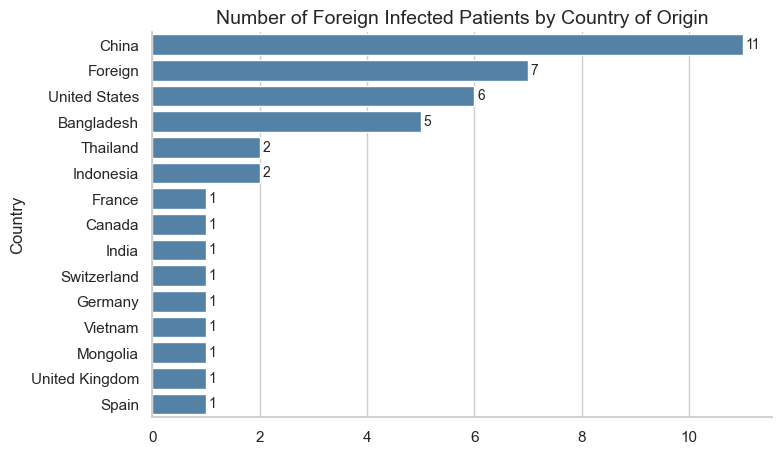

In [15]:
custom_plots.barplot_counts(
    sr=patient_info.loc[
        patient_info["country"] != "Korea", "country"
    ].value_counts(),
    min_value=1,
    ylabel="Country",
    title="Number of Foreign Infected Patients by Country of Origin",
)
plt.show()


#### 3.2.1. <a id='toc3_2_1_'></a>Summary on Patient Description       [&#8593;](#toc0_)

* Possibly due to occupational nuances, demographics and testing bias, as well as tendency to seek healthcare, higher proportion of COVID-19 patients were females.
* Koreans in their 20s were more often diagnosed with COVID-19. This may be related to a more active social engagement.
* High posibility to contract the virus at the workplace as well as an extensive contact tracing may explain why working-age population formed a big proportion of confirmed COVID-19 cases.
* Source of infection remained unidentified for a third of COVID-19 patients. The same amount of patients contracted the virus through the contact with a patient. Other common reasons for COVID-19 infection were traveling, as well as attending workplaces, churches, clubs, sport facilities, hospitals, care and nursing centers.

### 3.3. <a id='toc3_3_'></a>Patient Outcomes       [&#8593;](#toc0_)

As of June 30, 2020, most of the COVID-19 patients were already released. Two fifths were still in isolation. The mortality rate was 1.5%.

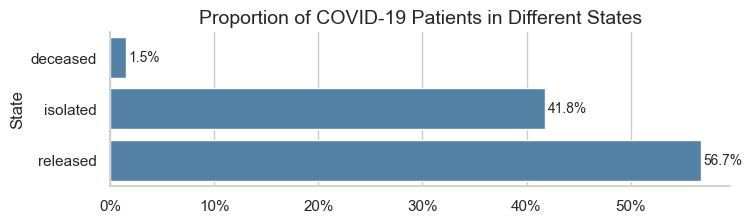

In [16]:
fig = custom_plots.barplot_counts(
    sr=patient_info["state"].value_counts(normalize=True),
    percentage=True,
    ylabel="State",
    title="Proportion of COVID-19 Patients in Different States",
)
fig.set_figheight(2)
plt.show()


There is information on 75 deceased patients. The age distribution of these patients is right-skewed meaning that deceased patients tend to be older. The distribution is shifted to the right more for females than males. This can mean that females dying from COVID-19 are usually older than males.

Distributions of isolated and released males and females are somehow similar. However, in both cases counts for patients older than 40 are higher for females than males. This can mostly represent the fact, that there is more females diagnosed with COVID-19 in this age group.

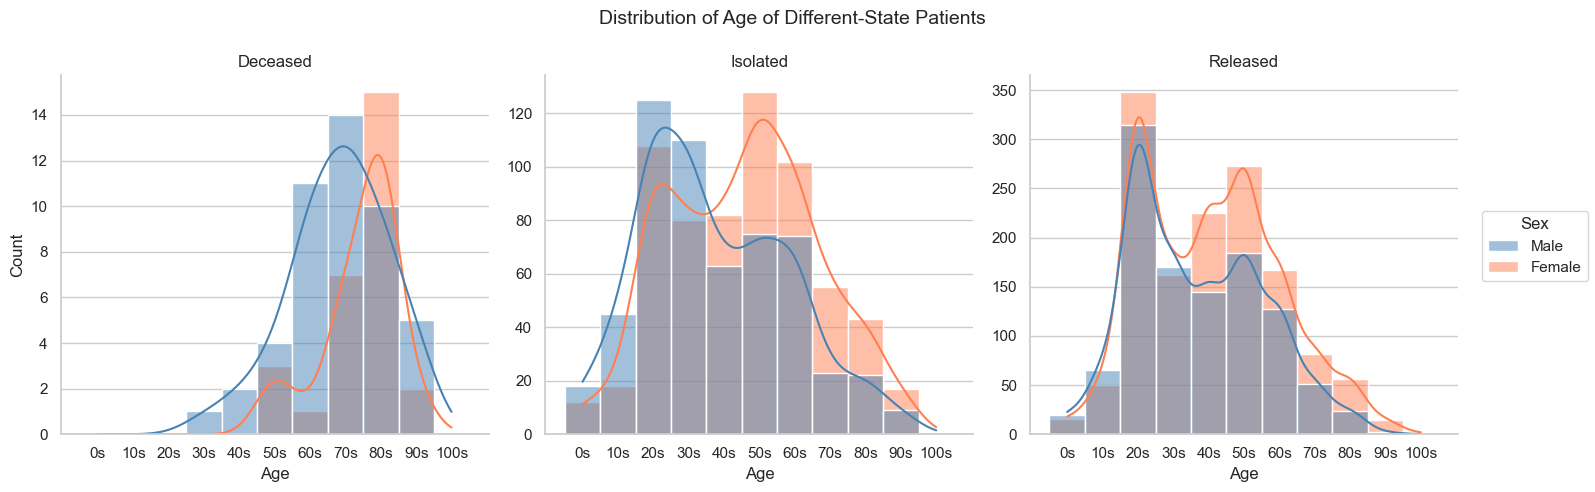

In [17]:
custom_plots.histplots_facet(
    df=patient_info,
    x="age",
    hue="sex",
    col="state",
    hue_order=["male", "female"],
    title="Distribution of Age of Different-State Patients",
)
plt.show()


As of June 30, 2020, no COVID-19 deaths under 30 occurred. However, mortality for patients in their 70s reached 9.1% and even exceeded 14% for patients in their 80s or 90s.

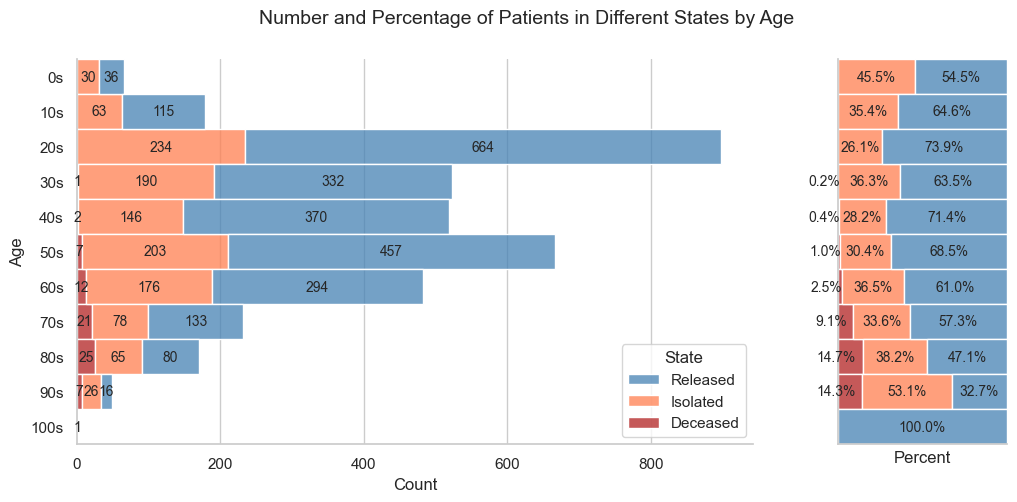

In [18]:
fig = custom_plots.histplots_count_percent(
    df=patient_info,
    y="age",
    hue="state",
    hue_order=["released", "isolated", "deceased"],
    title="Number and Percentage of Patients in Different States by Age",
)
fig.set_figwidth(12)
plt.show()


Though more females were diagnosed with COVID-19, more males died from the virus. Possible reasons for that could be:
* underlying health conditions, e.g., cardiovascular disease, hypertension, more prevalent in males,
* slower seeking of medical attention,
* occupation increasing exposure to the virus,
* certain lifestyle factors, such as smoking and alcohol consumption.

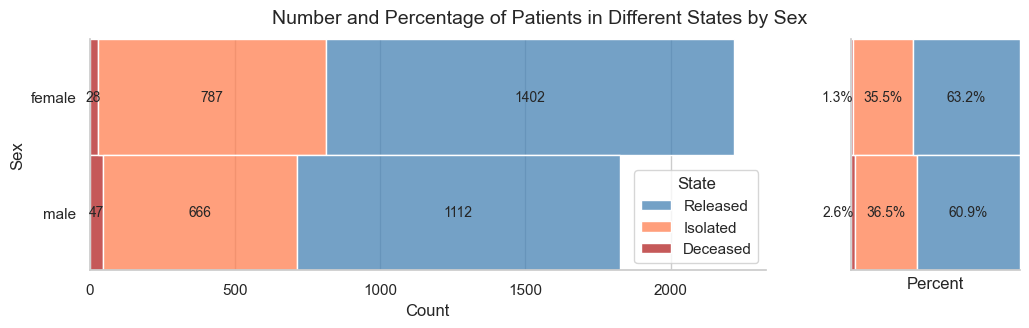

In [19]:
fig = custom_plots.histplots_count_percent(
    df=patient_info,
    y="sex",
    hue="state",
    hue_order=["released", "isolated", "deceased"],
    title="Number and Percentage of Patients in Different States by Sex",
)
fig.set_figwidth(12)
fig.set_figheight(3)
plt.show()


Duration before confirmation is similar among males and females. The median time is 3 days. For some patients, COVID-19 confirmation took longer than usual and this may mean that disease was confirmed by detecting a formed immunity. Backward confirmation (negative time) is possible if test is done before symptoms occur.

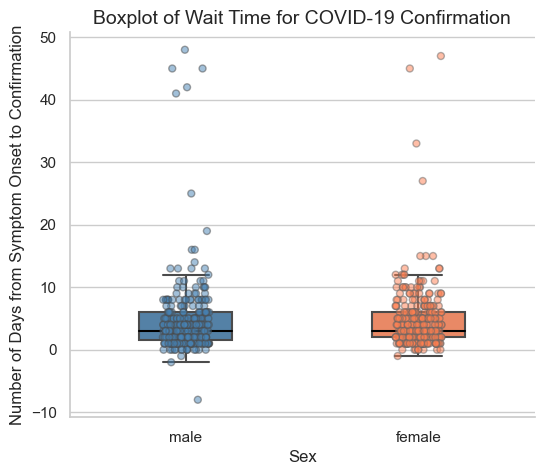

In [20]:
fig = custom_plots.box_strip_plot(
    df=patient_info,
    x="sex",
    y="symptom_to_confirmed",
    order=["male", "female"],
    title="Boxplot of Wait Time for COVID-19 Confirmation",
    ylabel="Number of Days from Symptom Onset to Confirmation",
)
fig.set_figwidth(6)
plt.show()


The median COVID-19 duration for deceased males and females were 5 and 8.5 days, respectively. In most cases, the disease lasted for up to 18 days before death.

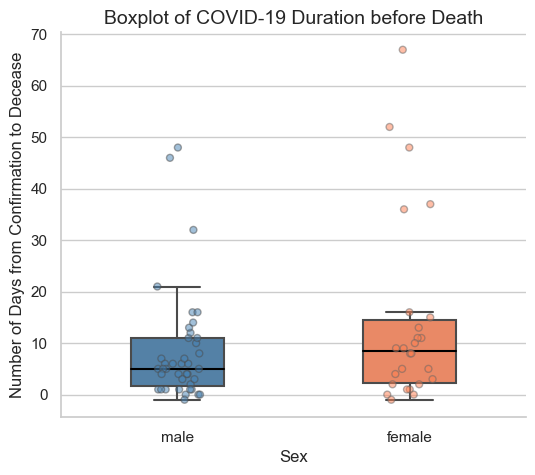

In [21]:
fig = custom_plots.box_strip_plot(
    df=patient_info,
    x="sex",
    y="confirmed_to_deceased",
    order=["male", "female"],
    title="Boxplot of COVID-19 Duration before Death",
    ylabel="Number of Days from Confirmation to Decease",
)
fig.set_figwidth(6)
plt.show()

The median time in isolation for young and middle-age patients was 22 days. However, the median time in isolation for old patients was longer - it took 26 for them to recover.

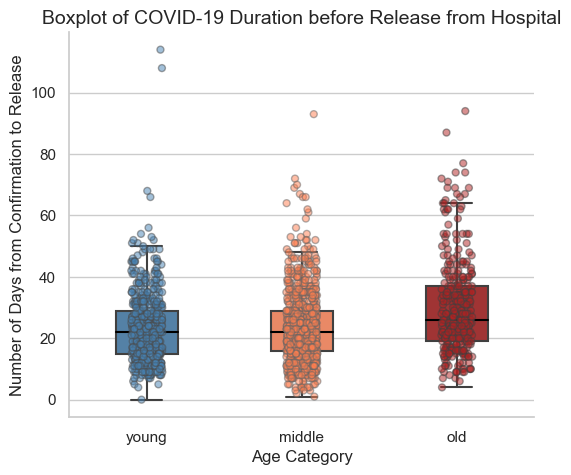

In [22]:
fig = custom_plots.box_strip_plot(
    df=patient_info,
    x="age_category",
    y="confirmed_to_released",
    order=["young", "middle", "old"],
    title="Boxplot of COVID-19 Duration before Release from Hospital",
    ylabel="Number of Days from Confirmation to Release",
)
fig.set_figwidth(6)
plt.show()


#### 3.3.1. <a id='toc3_3_1_'></a>Summary on Patient Outcomes       [&#8593;](#toc0_)

* Overall COVID-19 mortality rate up to the end of June, 2020 were 1.5%. However, it was markedly increased in patients older than 70.
* More males died from COVID-19 than females. Also, deceased females were older and their disease lasted for longer.
* The median stay in the hospital was 4 days longer for old patients compared to young and middle-aged.

### 3.4. <a id='toc3_4_'></a>Application to Lithuania       [&#8593;](#toc0_)

Though population of South Korea is considerably bigger than population of Lithuania, the distribution of sex and age is comparable between both countries as seen in population pyramids below. Notably, the proportion of females increase above 50 in Lithuania's case.

![alt](https://images.populationpyramid.net/capture/?selector=%23pyramid-share-container&url=https%3A%2F%2Fwww.populationpyramid.net%2Flithuania%2F2020%2F%3Fshare%3Dtrue) | ![alt](https://images.populationpyramid.net/capture/?selector=%23pyramid-share-container&url=https%3A%2F%2Fwww.populationpyramid.net%2Frepublic-of-korea%2F2020%2F%3Fshare%3Dtrue)

Based on COVID-19 patient data from South Korea, Lithuanian government could plan for the following, of course taking into account the local demographic and cultural differences, and possible mutation of the virus:
* Prepare enough hospitals or other places for patient isolation, which takes a median of 22 days, but may take longer especially for older patients.
* Draw attention to older population, which is more susceptible to COVID-19 death. Ensure proper support for them so that they can avoid the infection.
* Young and socially active population may be the most infected. Even though they are at lower risk of death from COVID-19, measures should be taken to inform them about the risks of spread.
* Since many confirmed cases can be tracked to patient contact, ensuring social distancing is still essential. Also, appropriate rules for places where many people gather or live together should be implemented.
* Remind the citizens that following a healthy lifestyle and seeking medical help on time are crucial.

## 4. <a id='toc4_'></a>COVID-19 Spread Cases        [&#8593;](#toc0_)

In this section, COVID-19 infection cases will be analyzed to better understand mass infections in South Korea.

### 4.1. <a id='toc4_1_'></a>Data Preparation and Cleaning      [&#8593;](#toc0_)

Load data on infection cases into `cases` dataframe. If possible, introduce appropriate data types and create necessary additional columns.

In [23]:
cases = data_loader.load_cases_data("./data/Case.csv")
print("\nPreview of the dataframe:")
cases.head()


./data/Case.csv successfully loaded into dataframe.
Helper column 'sub_city' created.

Data types of each column:
case_id            object
province           object
city               object
group                bool
infection_case     object
confirmed           int64
latitude          float64
longitude         float64
sub_city           object
dtype: object

Preview of the dataframe:


,case_id,province,city,group,infection_case,confirmed,latitude,longitude,sub_city
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.54,126.99,Yongsan-gu
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48,126.90,Gwanak-gu
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.51,126.88,Guro-gu
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.55,126.87,Yangcheon-gu
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.68,127.04,Dobong-gu


Check if there is any duplicated case IDs:

In [24]:
display(cases["case_id"].duplicated().any())


False

Only coordinates have missing values, which can be obtained from the data table on regions.

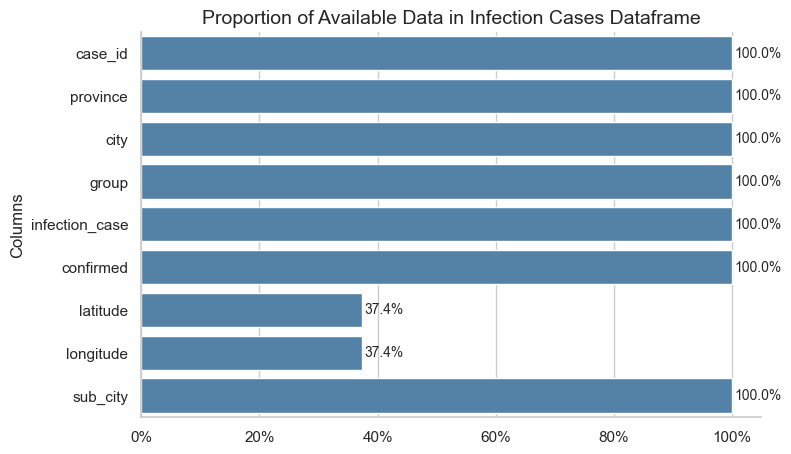

In [25]:
custom_plots.plot_available_data(
    df=cases,
    title="Proportion of Available Data in Infection Cases Dataframe",
)
plt.show()


Load data on regions into `region` dataframe. 

In [26]:
region = pd.read_csv("data/Region.csv")
region.head()


,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.57,126.98,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.52,127.05,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.53,127.12,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.64,127.03,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.55,126.85,36,56,1,1.17,14.39,5.7,1080


Merge data from `region` to fill in missing data in `cases` dataframe.

In [27]:
cases = cases.merge(
    region[["province", "city", "latitude", "longitude"]],
    left_on=["province", "sub_city"],
    right_on=["province", "city"],
    how="left",
)
cases.fillna(
    value={
        "latitude_x": cases["latitude_y"],
        "longitude_x": cases["longitude_y"],
    },
    inplace=True,
)
cases.drop(["latitude_y", "longitude_y", "city_y"], axis=1, inplace=True)
cases.rename(
    columns={
        "latitude_x": "latitude",
        "longitude_x": "longitude",
        "city_x": "city",
    },
    inplace=True,
)
cases.set_index("case_id", inplace=True)
cases.head()


,province,city,group,infection_case,confirmed,latitude,longitude,sub_city
case_id,,,,,,,,
1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.54,126.99,Yongsan-gu
1000002,Seoul,Gwanak-gu,True,Richway,119,37.48,126.90,Gwanak-gu
1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.51,126.88,Guro-gu
1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.55,126.87,Yangcheon-gu
1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.68,127.04,Dobong-gu


These are the infection cases which spilled out into other cities:

In [28]:
cases[cases["city"] == "from other city"]["infection_case"].value_counts()


Shincheonji Church                               14
Itaewon Clubs                                     8
Guro-gu Call Center                               3
Richway                                           3
Geumcheon-gu rice milling machine manufacture     2
Door-to-door sales in Daejeon                     2
Cheongdo Daenam Hospital                          2
Coupang Logistics Center                          2
SMR Newly Planted Churches Group                  1
Pilgrimage to Israel                              1
Eunpyeong-Boksagol culture center                 1
Uijeongbu St. Mary’s Hospital                     1
Seoul City Hall Station safety worker             1
Wangsung Church                                   1
Seosan-si Laboratory                              1
Korea Campus Crusade of Christ                    1
Yangcheon Table Tennis Club                       1
Uiwang Logistics Center                           1
Yongin Brothers                                   1
Anyang Gunpo

It seems that the same infection case has two titles, so it is corrected.

In [29]:
cases.loc[
    cases["infection_case"] == "Daejeon door-to-door sales", "infection_case"
] = "Door-to-door sales in Daejeon"


For visualization purposes, additional column is created limiting the size of the marker representing the number of confirmed COVID-19 patients.

In [30]:
cases["marker_confirmed"] = cases["confirmed"]
cases.loc[cases["marker_confirmed"] > 500, "marker_confirmed"] = 500


#### 4.1.1. <a id='toc4_1_1_'></a>Summary on Infection Case Data Quality      [&#8593;](#toc0_)

Data on COVID-19 infection cases had some missing values, which were successfully filled in with substitutes. Missing coordinates were obtained from the other source.

### 4.2. <a id='toc4_2_'></a> Infection Cases in South Korea     [&#8593;](#toc0_)

From the map bellow, it can be seen that biggest local group infections arose in and around Daegu and Seoul cities. The biggest group infection was in Shincheonji Daegu Church.

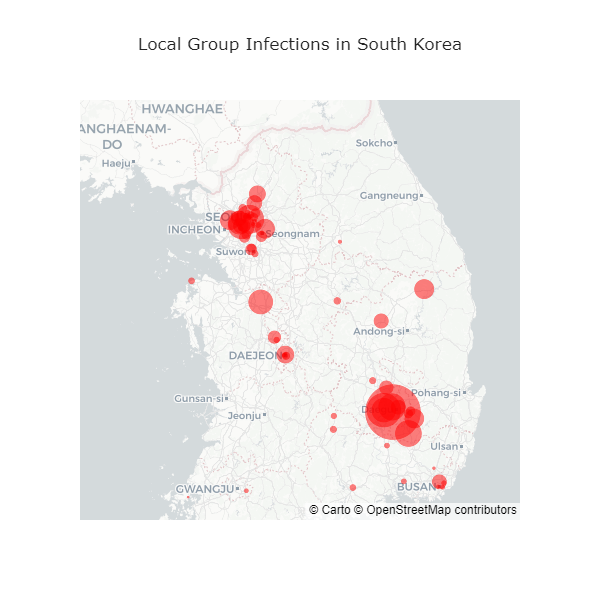

In [31]:
local_groups = cases["group"] & (cases["city"] != "from other city")
fig = custom_maps.map_dots(
    cases[local_groups],
    lat="latitude",
    lon="longitude",
    size="marker_confirmed",
    hover_name="infection_case",
    labels=["confirmed", "province", "city"],
    title="Local Group Infections in South Korea",
)
Image(fig.to_image(format="png")) if static else fig.show()

Unsurprisingly, most of COVID-19 cases related to overseas inflow were from the capital city of Seoul and the neighboring province of Gyeonggi-do.

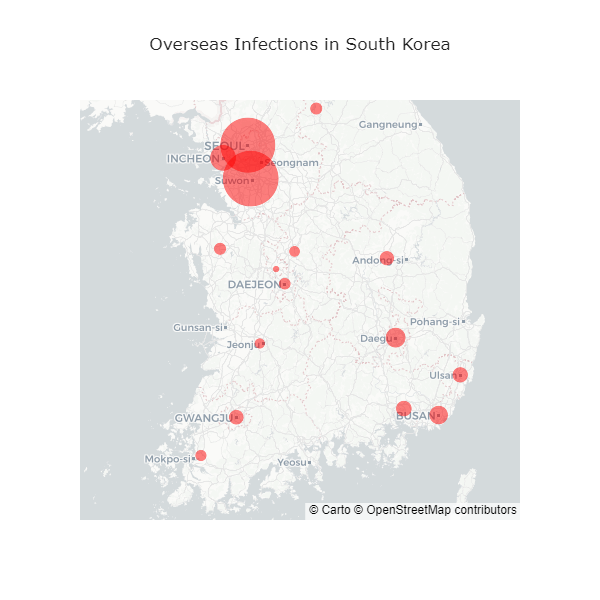

In [32]:
overseas_cases = cases["infection_case"] == "overseas inflow"
fig = custom_maps.map_dots(
    cases[overseas_cases],
    lat="latitude",
    lon="longitude",
    size="confirmed",
    hover_name="province",
    labels=["confirmed"],
    title="Overseas Infections in South Korea",
)
Image(fig.to_image(format="png")) if static else fig.show()


Since the biggest local infection was in Shincheonji Daegu Church, most of infections from patient contact also arose in Daegu.

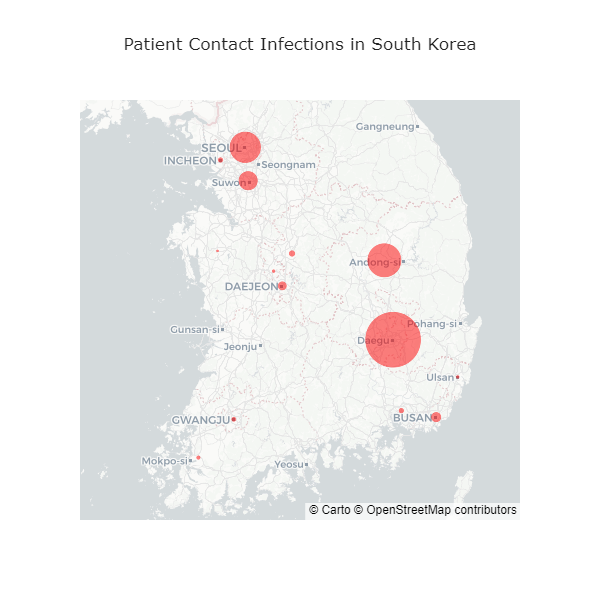

In [33]:
contact_cases = cases["infection_case"] == "contact with patient"
fig = custom_maps.map_dots(
    cases[contact_cases],
    lat="latitude",
    lon="longitude",
    size="marker_confirmed",
    hover_name="province",
    labels=["confirmed"],
    title="Patient Contact Infections in South Korea",
)
Image(fig.to_image(format="png")) if static else fig.show()


Group infections can add considerably to the spread of the virus. In the map bellow, outbreaks which spilled into more than 3 places are shown. Seems that Shincheonji Church and Itaewon Clubs made the most damage in this case.

In [34]:
# Consider only outbreaks spilled in at least 3 places
outbreaks = cases[cases["city"] == "from other city"][
    "infection_case"
].value_counts()
outbreaks = outbreaks[outbreaks >= 3].index.to_list()
outbreak_cases = cases[cases["infection_case"].isin(outbreaks)]
# Gather coordinates connecting center and outbreaks
outbreak_lines = outbreak_cases.loc[
    outbreak_cases["city"] != "from other city",
    ["infection_case", "latitude", "longitude"],
].set_index("infection_case")
outbreak_lines.rename(
    columns={"latitude": "epicenter_lat", "longitude": "epicenter_long"},
    inplace=True,
)
outbreak_lines_ref = outbreak_cases.loc[
    outbreak_cases["city"] == "from other city",
    ["infection_case", "latitude", "longitude"],
].set_index("infection_case")
outbreak_lines_ref.rename(
    columns={"latitude": "outbreak_lat", "longitude": "outbreak_long"},
    inplace=True,
)
outbreak_lines = outbreak_lines.merge(
    outbreak_lines_ref, how="left", on="infection_case"
)
outbreak_lines.reset_index(inplace=True)


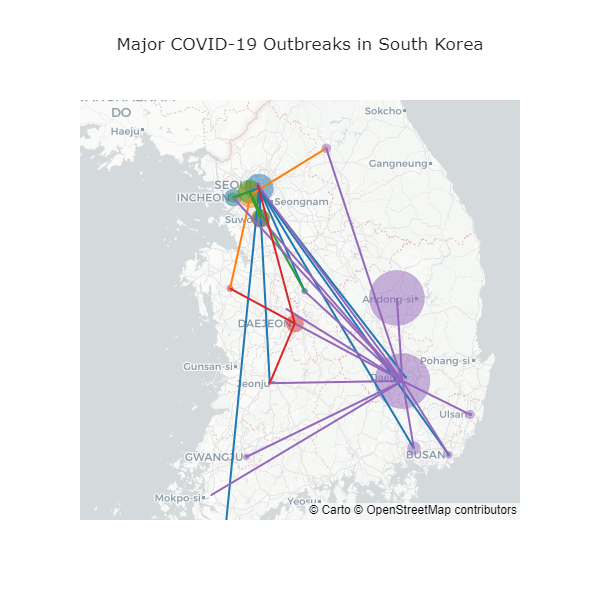

In [35]:
fig = custom_maps.map_dots(
    outbreak_cases,
    lat="latitude",
    lon="longitude",
    size="marker_confirmed",
    color="infection_case",
    color_seq=px.colors.qualitative.D3,
    hover_name="infection_case",
    labels=["confirmed", "province"],
    title="Major COVID-19 Outbreaks in South Korea",
)

colors = dict(
    zip(outbreak_cases["infection_case"].unique(), px.colors.qualitative.D3)
)

for _, row in outbreak_lines.iterrows():
    fig.add_traces(
        px.line_mapbox(
            lat=[row["epicenter_lat"], row["outbreak_lat"]],
            lon=[row["epicenter_long"], row["outbreak_long"]],
        ).data,
    )
    last_trace_index = len(fig.data) - 1
    fig.data[-1].line.color = colors[row["infection_case"]]

fig.update_layout(showlegend=False)
Image(fig.to_image(format="png")) if static else fig.show()


### 4.3. <a id='toc4_3_'></a>Insights for Outbreak Prevention     [&#8593;](#toc0_)

Based on COVID-19 case data from South Korea, Lithuanian government could plan for the following:
* Control mass gatherings, such as, religious meetings or places for socialization.
* Thoroughly test people arriving from abroad.
* Limit traveling within the country to control local spread.

## 5. <a id='toc5_'></a>Pandemic Evolution and Government Reaction          [&#8593;](#toc0_)

In this section, COVID-19 spread over time will be analyzed. Spread in provinces will be considered as well as daily and accumulated number of tests, confirmed, released and deceased COVID-19 patients. This information will be aligned with policies taken by the government of South Korea.

### 5.1. <a id='toc5_1_'></a>Data Preparation and Cleaning           [&#8593;](#toc0_)

Load time series data on daily accumulated confirmed, released and deceased patients in South Korea provinces into `time_province` dataframe. Right away, supplement the `time_province` dataframe with coordinates from the `region` dataframe for visualization purposes. 

In [36]:
time_province = pd.read_csv("data/TimeProvince.csv", parse_dates=["date"])
time_province = time_province.merge(
    region[["city", "latitude", "longitude"]],
    left_on=["province"],
    right_on=["city"],
    how="left",
)
time_province.drop(["city", "time"], axis=1, inplace=True)
time_province.tail()


,date,province,confirmed,released,deceased,latitude,longitude
2766,2020-06-30,Jeollabuk-do,27,21,0,35.82,127.11
2767,2020-06-30,Jeollanam-do,24,19,0,34.82,126.46
2768,2020-06-30,Gyeongsangbuk-do,1389,1328,54,36.58,128.51
2769,2020-06-30,Gyeongsangnam-do,134,128,0,35.24,128.69
2770,2020-06-30,Jeju-do,19,16,0,33.49,126.50


No values are missing from `time_province` dataframe:

In [37]:
time_province.isna().any().any()


False

Load time series data on daily accumulated tests, confirmed, released and deceased patients in entire South Korea into `time` dataframe.

In [38]:
time = pd.read_csv("data/Time.csv", index_col="date", parse_dates=True)
time.drop(["time"], axis=1, inplace=True)  # provides no useful information
time.head(10)


,test,negative,confirmed,released,deceased
date,,,,,
2020-01-20,1,0,1,0,0
2020-01-21,1,0,1,0,0
2020-01-22,4,3,1,0,0
2020-01-23,22,21,1,0,0
2020-01-24,27,25,2,0,0
2020-01-25,27,25,2,0,0
2020-01-26,51,47,3,0,0
2020-01-27,61,56,4,0,0
2020-01-28,116,97,4,0,0


No values are missing from `time_province` dataframe:

In [39]:
time.isna().any().any()


False

Confirmed and negative columns do not sum up to the number of tests. Thus, we would assume that confirmed column represents the positive test confirmed with more robust laboratory methods. The dataframe is expanded so that it contains not only accumulated information but also daily new information. Also,  ratio of confirmed cases and performed tests are calculated.

In [40]:
time = data_loader.update_time_df(
    df=time,
    expand=["test", "negative", "confirmed", "released", "deceased"],
    ratio=("confirmed", "test"),
)
time.tail()


,accumulated_test,accumulated_negative,accumulated_confirmed,accumulated_released,accumulated_deceased,accumulated_confirmed_to_test_ratio,new_test,new_negative,new_confirmed,new_released,new_deceased,new_confirmed_to_test_ratio
date,,,,,,,,,,,,
2020-06-26,1232315,1200885,12602,11172,282,0.01,11837,11870,39,198,0,3.29e-03
2020-06-27,1243780,1211261,12653,11317,282,0.01,11465,10376,51,145,0,4.45e-03
2020-06-28,1251695,1219975,12715,11364,282,0.01,7915,8714,62,47,0,7.83e-03
2020-06-29,1259954,1228698,12757,11429,282,0.01,8259,8723,42,65,0,5.09e-03
2020-06-30,1273766,1240157,12800,11537,282,0.01,13812,11459,43,108,0,3.11e-03


It seems that negative (and probably confirmed) cases might be delayed because they sometimes surpass number of tests. Also, this might be the reason why negative and confirmed does not sum up to test number.

Load data on COVID-19-related policies implemented by the government of South Korea into `policy` dataframe. This dataframe provide information on policy type, some details, its start and end dates.

In [41]:
policy = pd.read_csv("data/Policy.csv", index_col="policy_id")
policy.head()


,country,type,gov_policy,detail,start_date,end_date
policy_id,,,,,,
1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


Some policies in the dataframe lack details and more than 60% lack end date. This is understandable because the last time information was updated most of the policies were effectively in place.

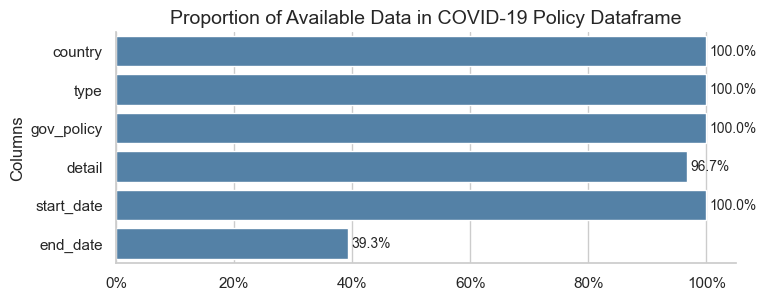

In [42]:
fig = custom_plots.plot_available_data(
    policy, title="Proportion of Available Data in COVID-19 Policy Dataframe"
)
fig.set_figheight(3)
plt.show()


#### 5.1.1. <a id='toc5_1_1_'></a>Summary on Timeseries and Government Policy Data Quality    [&#8593;](#toc0_)

The timeseries data are free of missing values, but there may be discrepancies in the numbers, likely due to false positive tests that were later corrected using laboratory methods and delayed reporting of results in general. In government policy data, the absence of an end date is common because certain policies were still in effect at the time the data were last updated.

### 5.2. <a id='toc5_2_'></a>Half a Year of COVID-19 in South Korea    [&#8593;](#toc0_)

In the map bellow, the spread of COVID-19 in South Korea provinces is illustrated. Starting in the capital region, the infection quickly gained momentum in Daegu. Such a big number of confirmed COVID-19 infections may be related to the extensive contact tracing after Shincheonji Church outbreak.

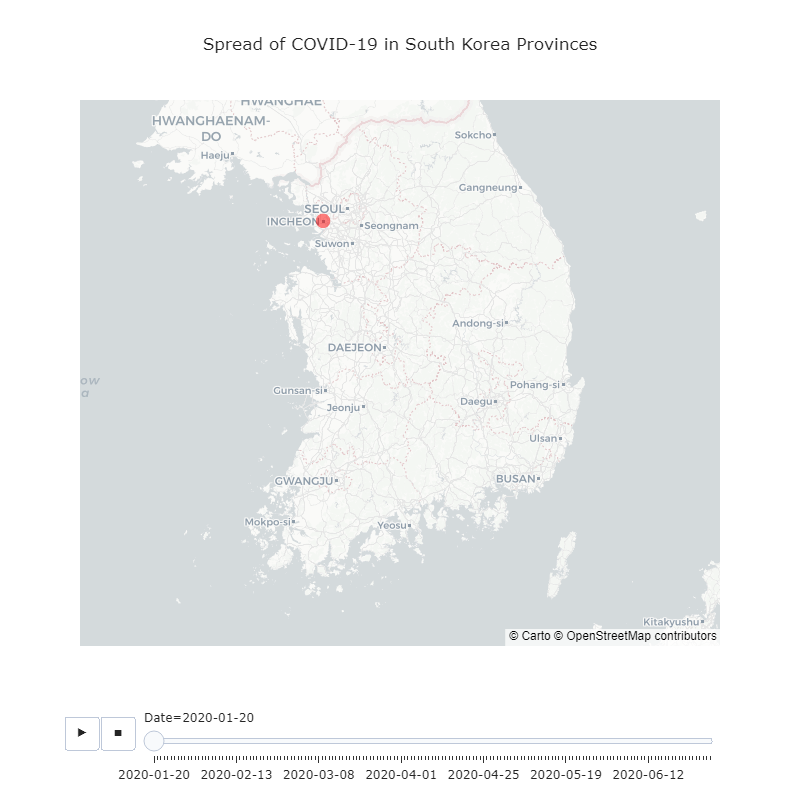

In [43]:
time_province["date_str"] = time_province["date"].astype(str)
time_province["marker_confirmed"] = np.sqrt(time_province["confirmed"])
fig = custom_maps.map_dots(
    time_province,
    lat="latitude",
    lon="longitude",
    size="marker_confirmed",
    size_max=100,
    hover_name="province",
    labels=["confirmed", "date_str"],
    animation="date_str",
    title="Spread of COVID-19 in South Korea Provinces",
)
fig.update_layout(
    width=800, height=800, sliders=[{"currentvalue": {"prefix": "Date="}}]
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100
Image(fig.to_image(format="png")) if static else fig.show()


Bellow is a timeline of all policies implemented by the government of South Korea with the aim to control the spread of the COVID-19 virus.

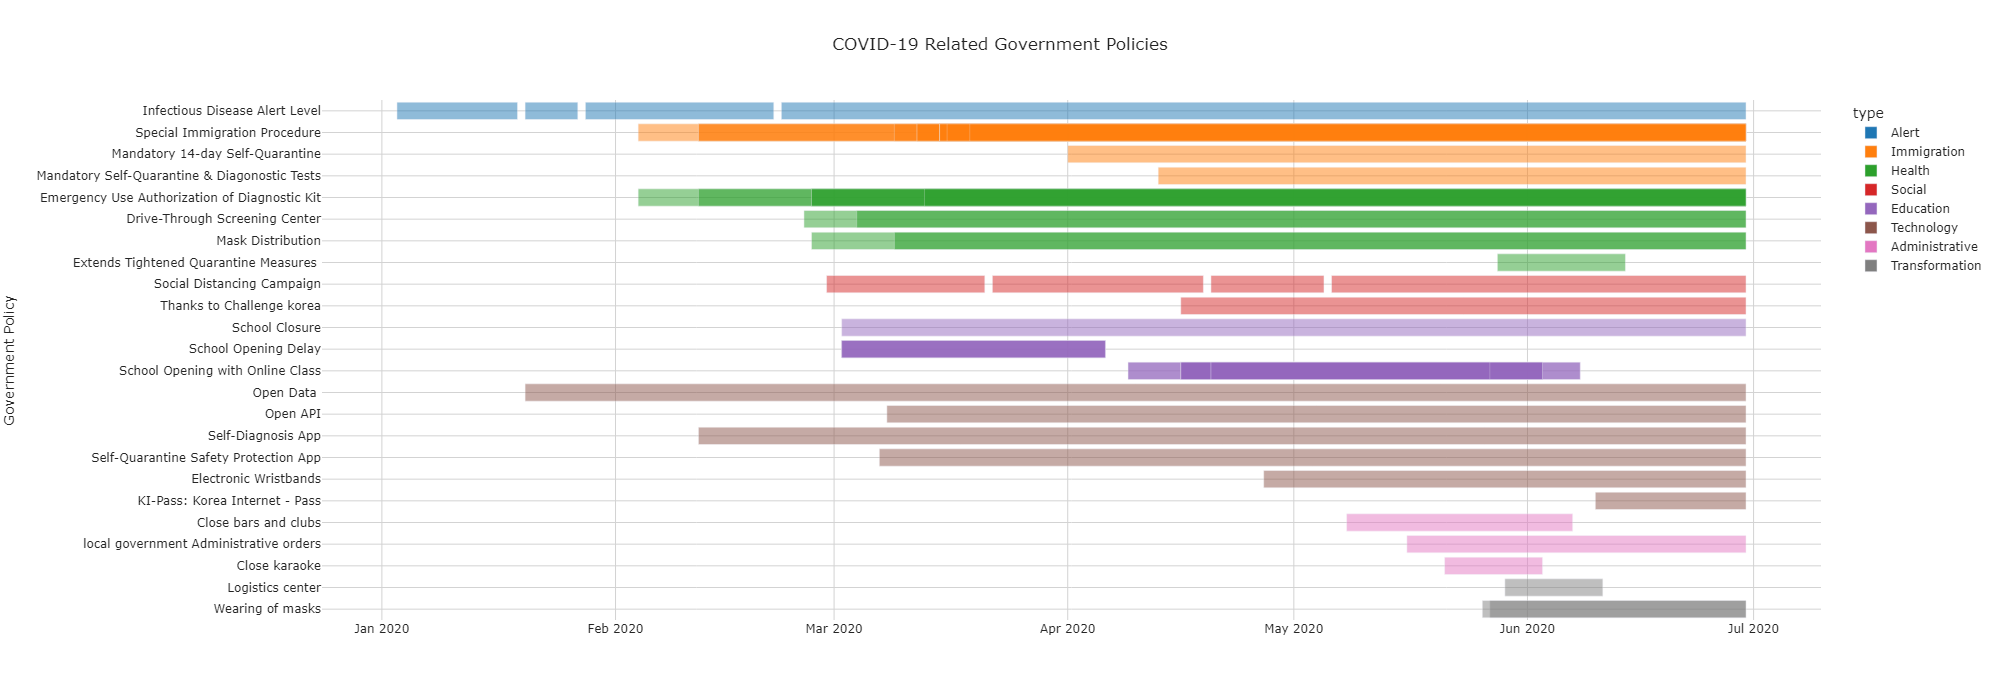

In [44]:
policy["end_date_relative"] = policy["end_date"]  # only for plotting purposes
policy.loc[policy["end_date_relative"].isna(), "end_date_relative"] = (
    "2020-06-30"
)
fig = px.timeline(
    policy,
    x_start="start_date",
    x_end="end_date_relative",
    y="gov_policy",
    color_discrete_sequence=px.colors.qualitative.D3,
    color="type",
    title="COVID-19 Related Government Policies",
    hover_data={
        "type": False,
        "end_date_relative": False,
        "gov_policy": True,
        "start_date": True,
        "detail": True,
        "end_date": True,
    },
    labels={
        "start_date": "Start Date",
        "end_date": "End Date",
        "gov_policy": "Government Policy",
        "detail": "Description",
    },
    opacity=0.5,
    height=700,
)
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"gridcolor": "lightgrey", "autorange": "reversed"},
    xaxis={"gridcolor": "lightgrey"},
)
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

For visualization purposes, some policies are selected as more important:
* Infectious Disease Alert Level 4 (Red),
* Drive-Through Screening Center,
* Social Distancing Campaign (Strong),
* Social Distancing Campaign (Weak),
* School Closure,
* Close bars and clubs.	

Start dates of these policies are used for annotations.

In [45]:
def add_policy_annotation(fig: Figure, ydata: str) -> None:
    """Function to add policy annotations."""
    selected_policy = policy.loc[[4, 25, 29, 32, 34, 54]]
    for _, row in selected_policy.iterrows():
        fig.add_annotation(
            x=row["start_date"],
            y=time.loc[
                time.index.astype(str) == row["start_date"], ydata
            ].item(),
            text=row["gov_policy"],
            showarrow=True,
            arrowhead=3,
        )


End of February marked the highest number of new confirmed COVID-19 cases. On that date, the government started strong social distancing campaign and school closure followed shortly. Social distancing campaign was weakened as the number of new confirmed COVID-19 infections dropped to a couple per day. Interestingly, closure of clubs and bars followed just after as the government was trying to control the increase in new infections.

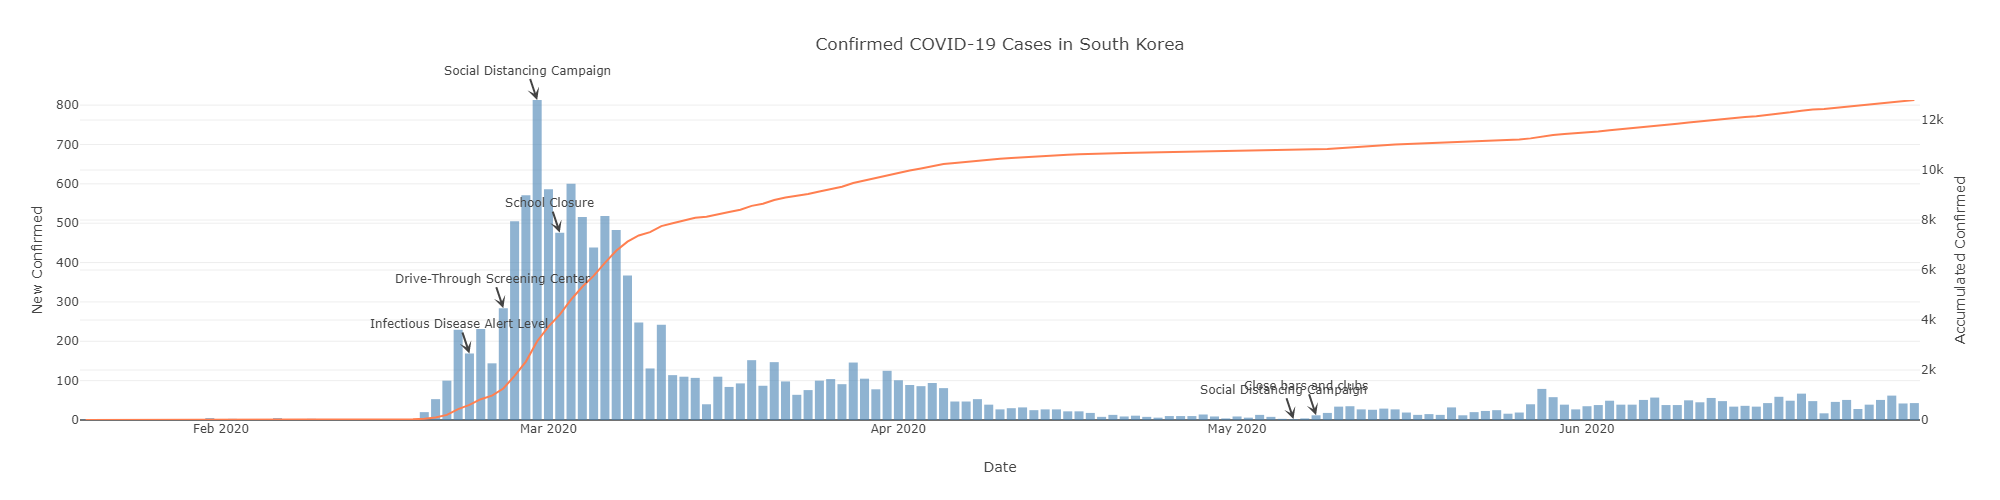

In [46]:
fig = custom_plots.timeseries_new_accumulated(
    df=time,
    accumulated="accumulated_confirmed",
    new="new_confirmed",
    title="Confirmed COVID-19 Cases in South Korea",
)
add_policy_annotation(fig, ydata="new_confirmed")
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

Number of daily COVID-19 tests markedly increased with the opening of the drive-through screening centers. Surge in testing was also seen with the weakest social distancing campaign. Daily testing also exhibits weekly fluctuations with less test from yesterday reported on Sunday and Monday.

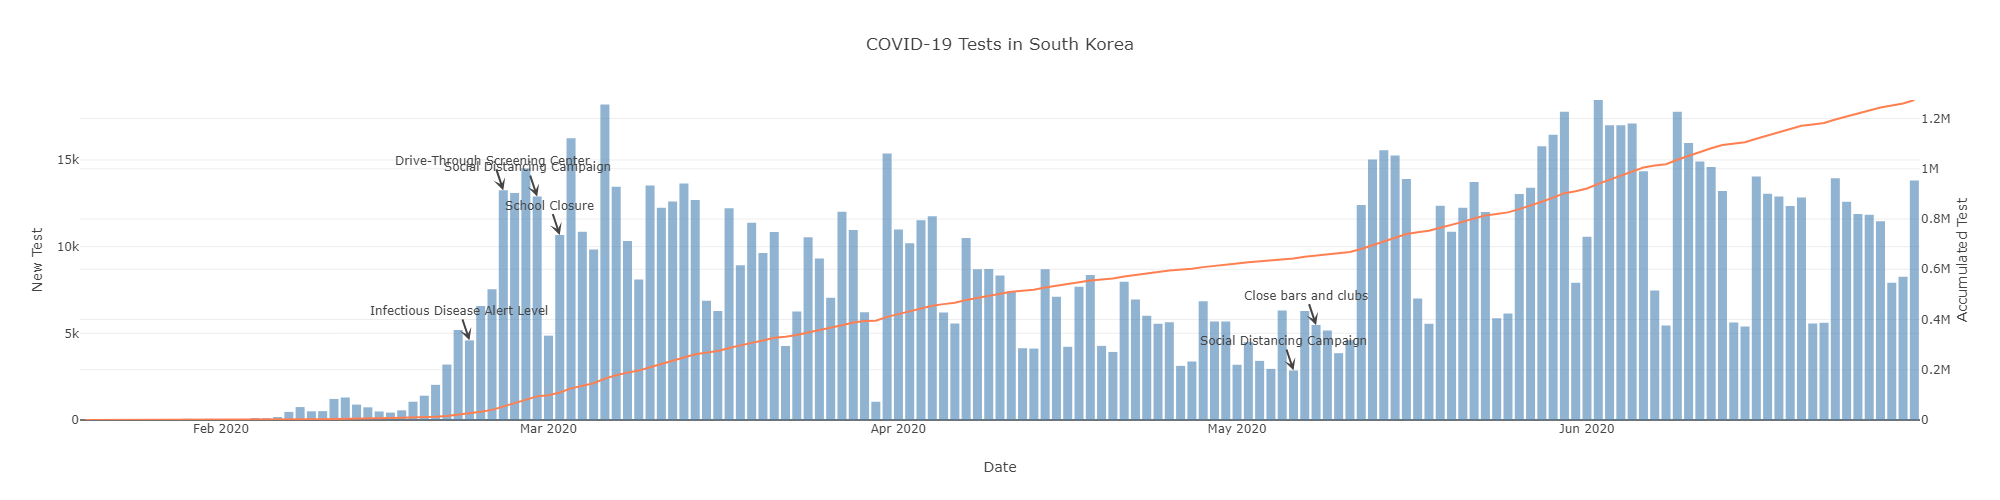

In [47]:
fig = custom_plots.timeseries_new_accumulated(
    df=time,
    accumulated="accumulated_test",
    new="new_test",
    title="COVID-19 Tests in South Korea",
)
add_policy_annotation(fig, ydata="new_test")
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

As could be expected, surge in released COVID-19 patients follows two weeks after the surge in COVID-19 confirmations.

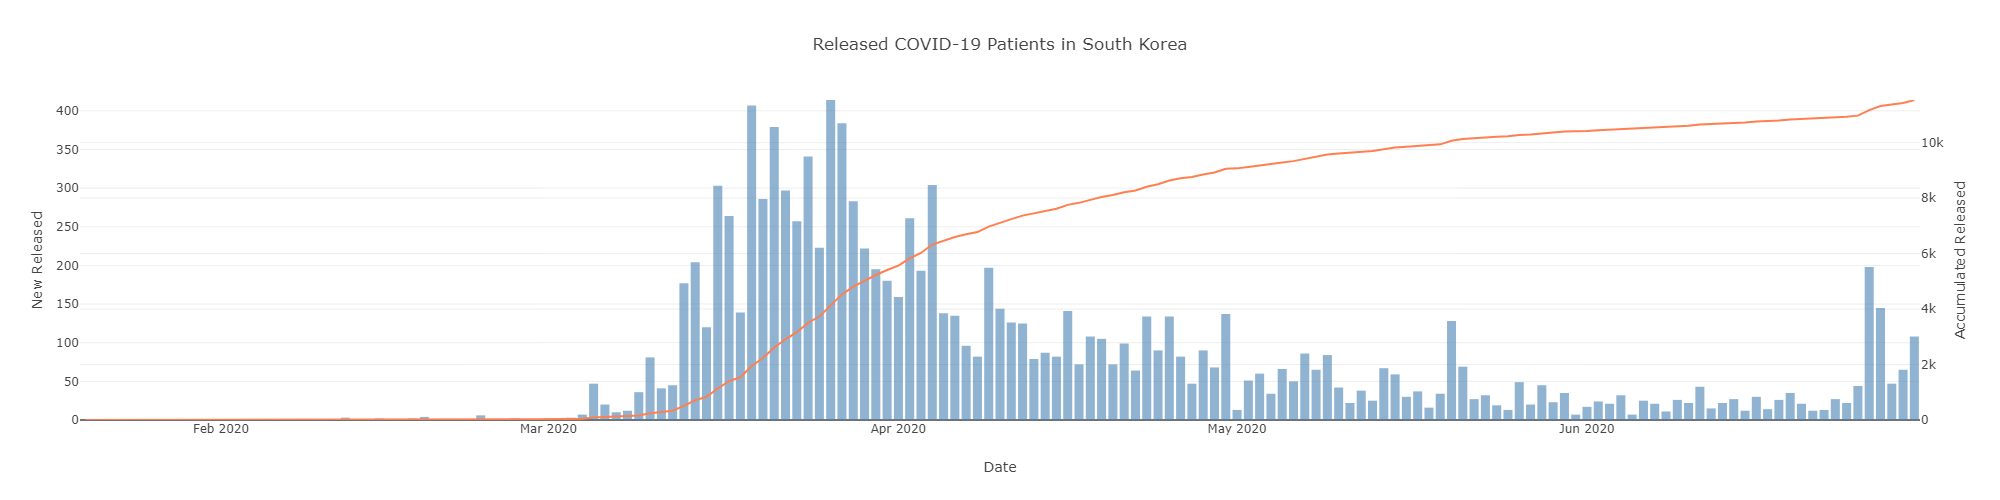

In [48]:
fig = custom_plots.timeseries_new_accumulated(
    df=time,
    accumulated="accumulated_released",
    new="new_released",
    title="Released COVID-19 Patients in South Korea",
)
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

Deaths from COVID-19 started at the very start of the pandemic and only dropped to 2 death per day on April 17, 2020.

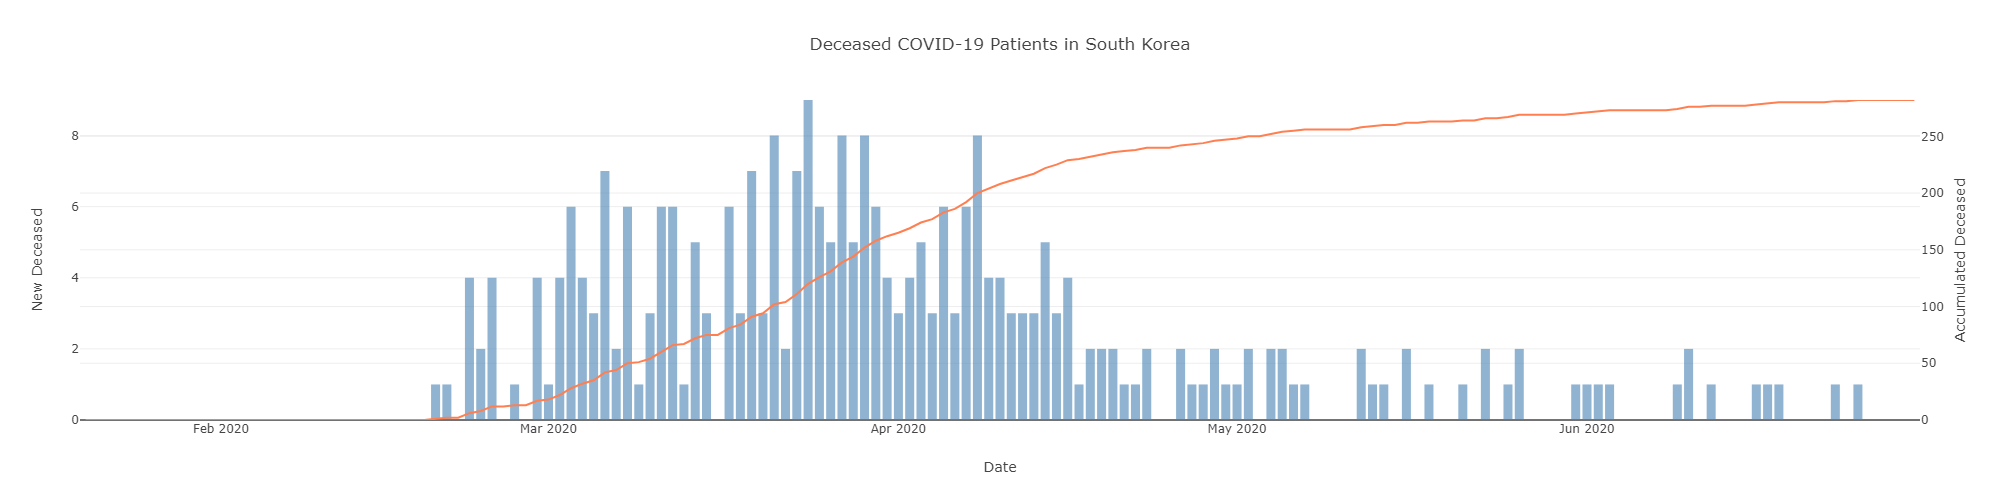

In [49]:
fig = custom_plots.timeseries_new_accumulated(
    df=time,
    accumulated="accumulated_deceased",
    new="new_deceased",
    title="Deceased COVID-19 Patients in South Korea",
)
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

Positive test ratio was very high initially due to low testing capabilities. It started to climb again on February 19 and reached the peak on March 1. The government managed to keep the positive test ratio steadily below 1% since April 1. March 30 strikes as outlier with a very high positive test ratio. However, on that day an unusually low number of test were reported; thus, it might be related to some issues in reporting.

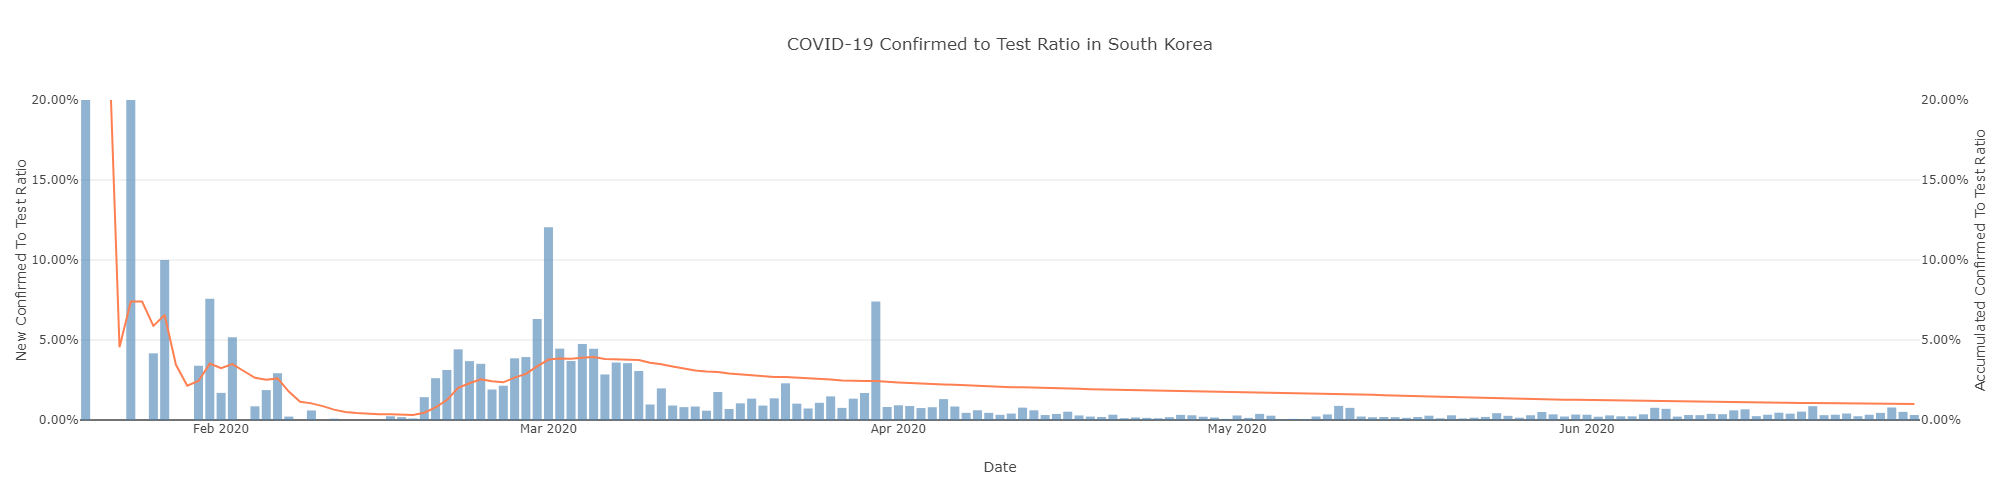

In [50]:
fig = custom_plots.timeseries_new_accumulated(
    df=time,
    accumulated="accumulated_confirmed_to_test_ratio",
    new="new_confirmed_to_test_ratio",
    title="COVID-19 Confirmed to Test Ratio in South Korea",
)
fig.update_layout(
    yaxis={"range": [0, 0.2], "tickformat": ",.2%"},
    yaxis2={"range": [0, 0.2], "tickformat": ",.2%"},
)
Image(fig.to_image(format="png", width=2000)) if static else fig.show()

### 5.3. <a id='toc5_3_'></a> Insights for Pandemic Management   [&#8593;](#toc0_)

Based on COVID-19 timeseries data as well as the list of policies implemented by the government of South Korea, Lithuanian government could plan for the following:
* Timely implementation of social distancing campaigns. 
* Extensive testing with as many as possible convenient locations.
* Targeted control of places for mass gathering, from schools to clubs.
* Testing promotion as restrictions are relaxed.

## 6. <a id='toc6_'></a>Recommendations   [&#8593;](#toc0_)

Recommendations for Lithuanian government in preparation to fight the next wave of the pandemic:
1. Patient management:
    * Inform the citizens not only about the risk of death but also about the risk of spread.
    * Increase the awareness about the need for timely testing.
    * Pay special attention to the older population and ensure that they can get the services they need, e.g., shopping, healthcare, safely.
2. Outbreak control:
    * Keep mandatory testing for travelers in place.
    * Limit traveling within the country if needed to rein in a big outbreak.
    * Implement contact tracing to stop the outbreak as soon as possible.
3. Policy implementation:
    * Start social distancing campaigns as needed and ensure restrictions proportional to the wanted outcomes.
    * Ensure that testing is widely available so that people can safely proceed with their daily lives.
    * Implement rules for places of mass gatherings so that they can safely function.   

## 7. <a id='toc7_'></a>Suggestions for Improvement   [&#8593;](#toc0_)

The analysis of COVID-19 data from South Korea and recommendations for fighting the next wave of the pandemic in Lithuania could be improved in a couple of different ways:
* More insights can be gathered from other sources available on Kaggle.
* Predictions, e.g., of death risk, hospital stay duration, etc.,  could be done.
* Differences between age and sex groups could be tested for statistical significance.
* More information on the local context could be gathered to understand the possibility to apply the analysis of South Korea's data for Lithuania's case.